###### Analysis of Covid-19 death rates at the county level


# BLUF (bottom line up front): 
# In November, Covid has made it more deadly to live in more than 600 counties in the US than it was to deploy to Iraq and Afghanistan during the deadliest year of those wars.

## We're going to do some math to compare covid death rates to other known death rates.  We're not going to adjust for age, demographics, or anything else that might bring statistical nuance but lose members of a general audience.

### Let's compare the rate of Covid-19 deaths in various geography to historical death rates by other causes.  This will help establish a more intuitive sense of "risk" that is easier to communicate to a general audience.

### Let's establish the mortality rate for troops deployed to Iraq and Afghanistan during the deadliest years of those wars

### The commonly used metric for mortality statistics is "deaths per hundred thousand population per year."  We'll use data from Statista and a 2018 RAND report to establish a measurement of "deaths per hundred-thousand-deployed-troop-years" for each year.

### That's a bit of a mouthful...we're summing all of the time spent deployed to the wars by all troops in a year ('hundred thousand troop-years') for each of the years 2001 through 2015.

### https://www.statista.com/statistics/263798/american-soldiers-killed-in-iraq/
### https://www.statista.com/statistics/262894/western-coalition-soldiers-killed-in-afghanistan/
### https://www.rand.org/pubs/research_reports/RR1928.html?adbsc=social_20180320_2212921&adbid=975928167633334272&adbpl=tw&adbpr=22545453

# First, let's walk through the methodology and check it against the Johns Hopkins Covid-19 tracker page

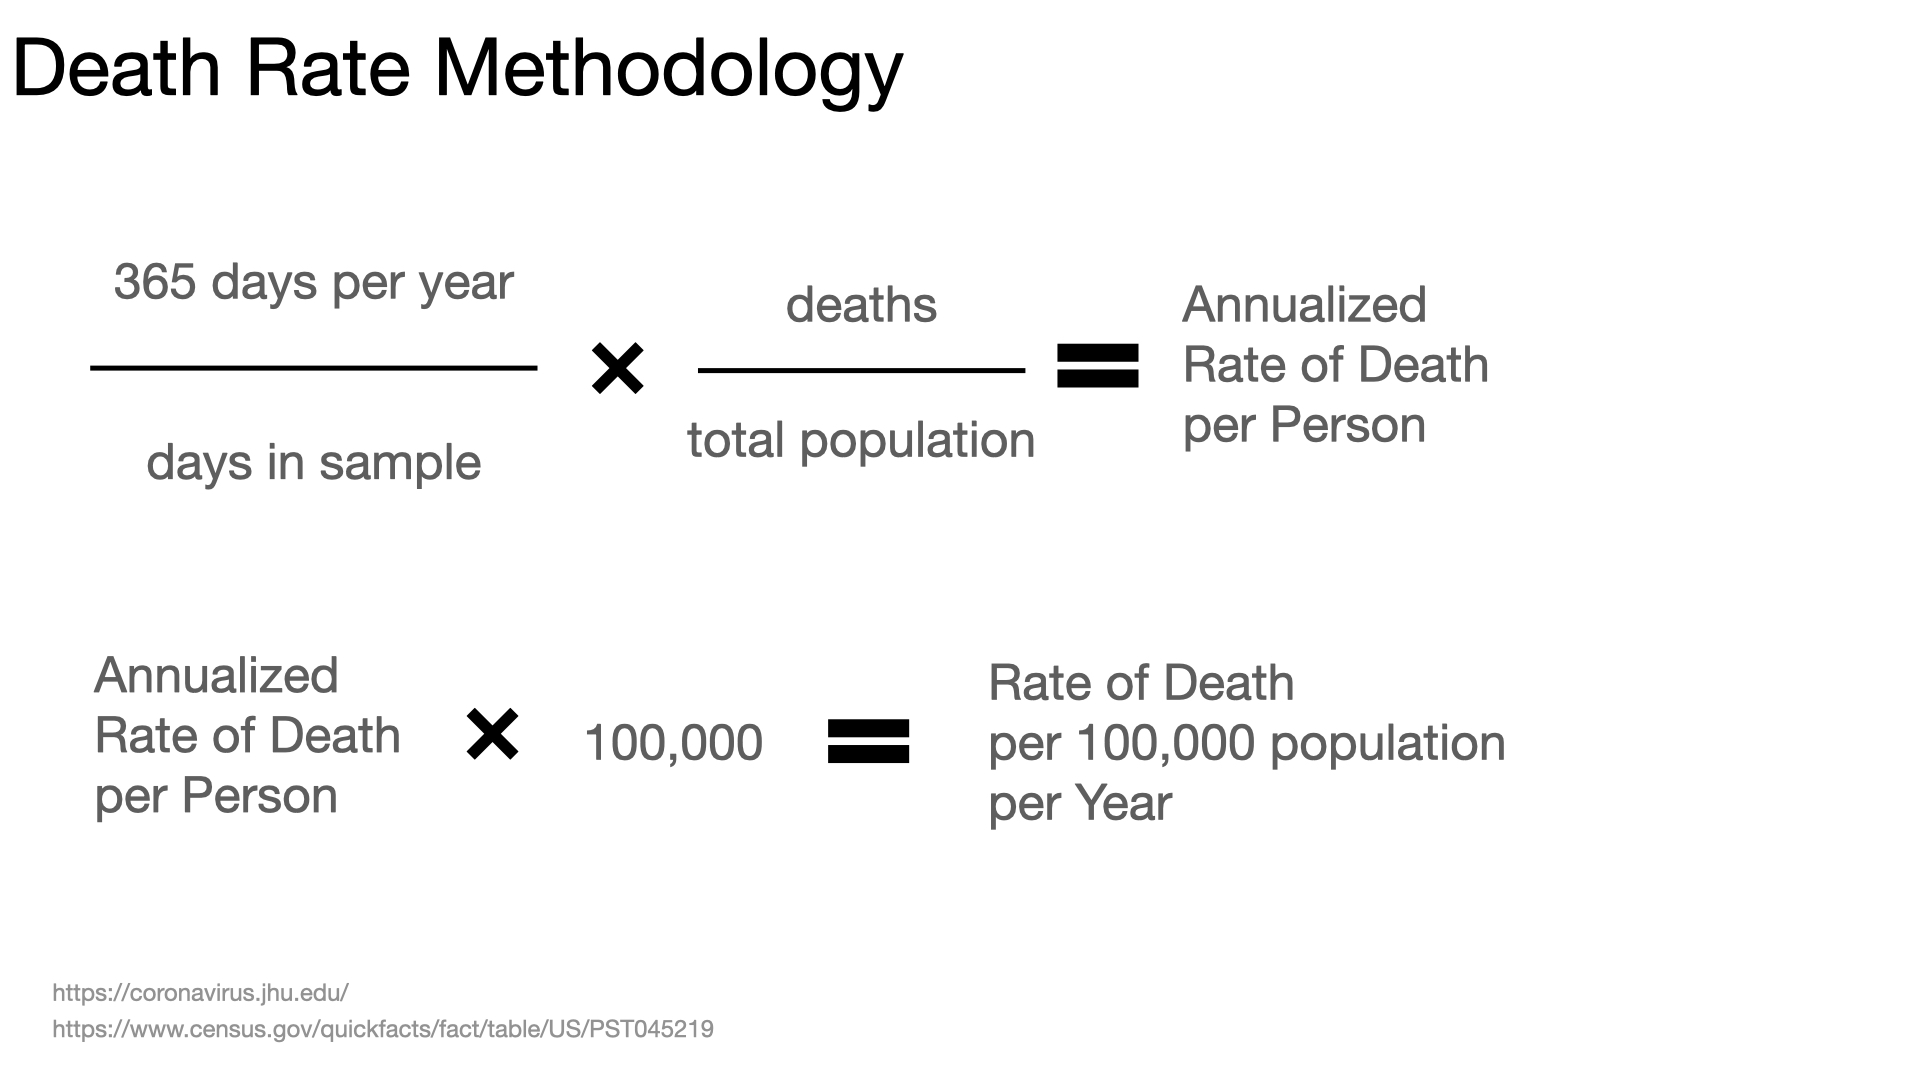

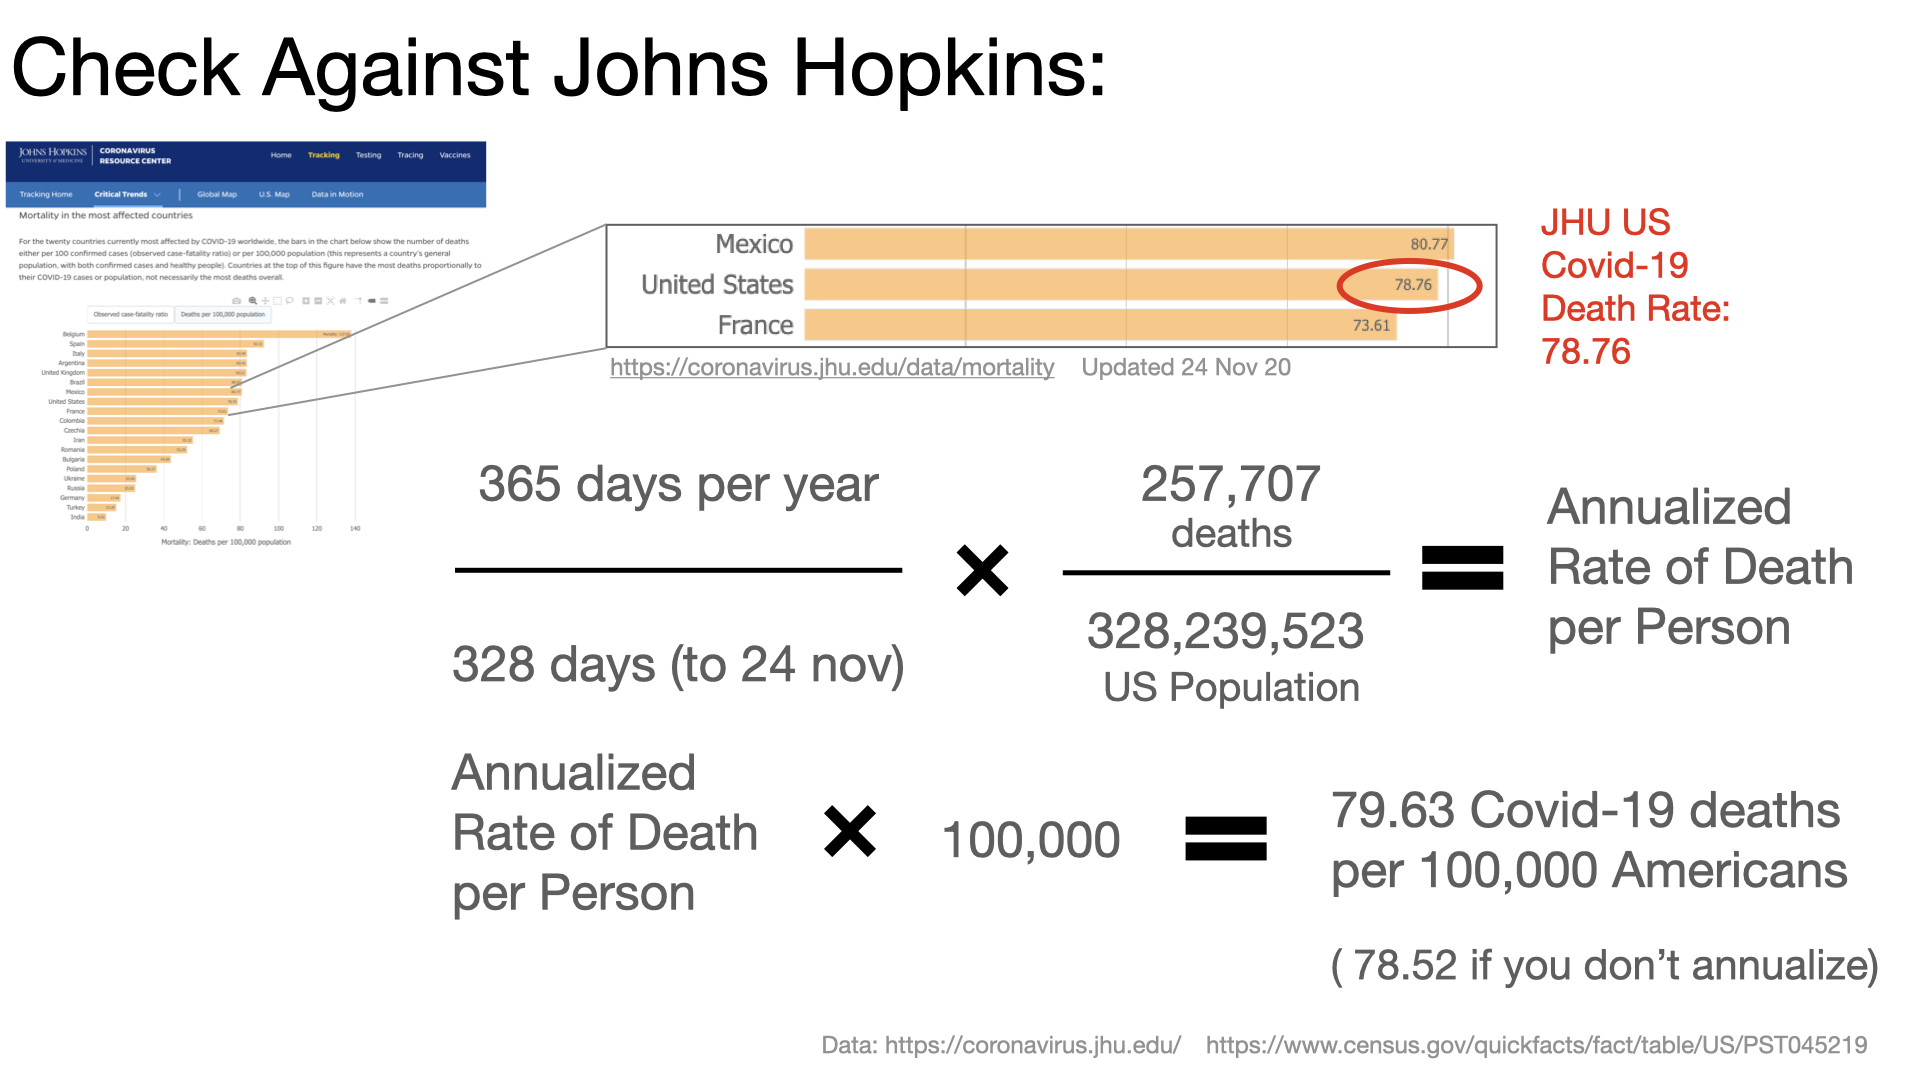

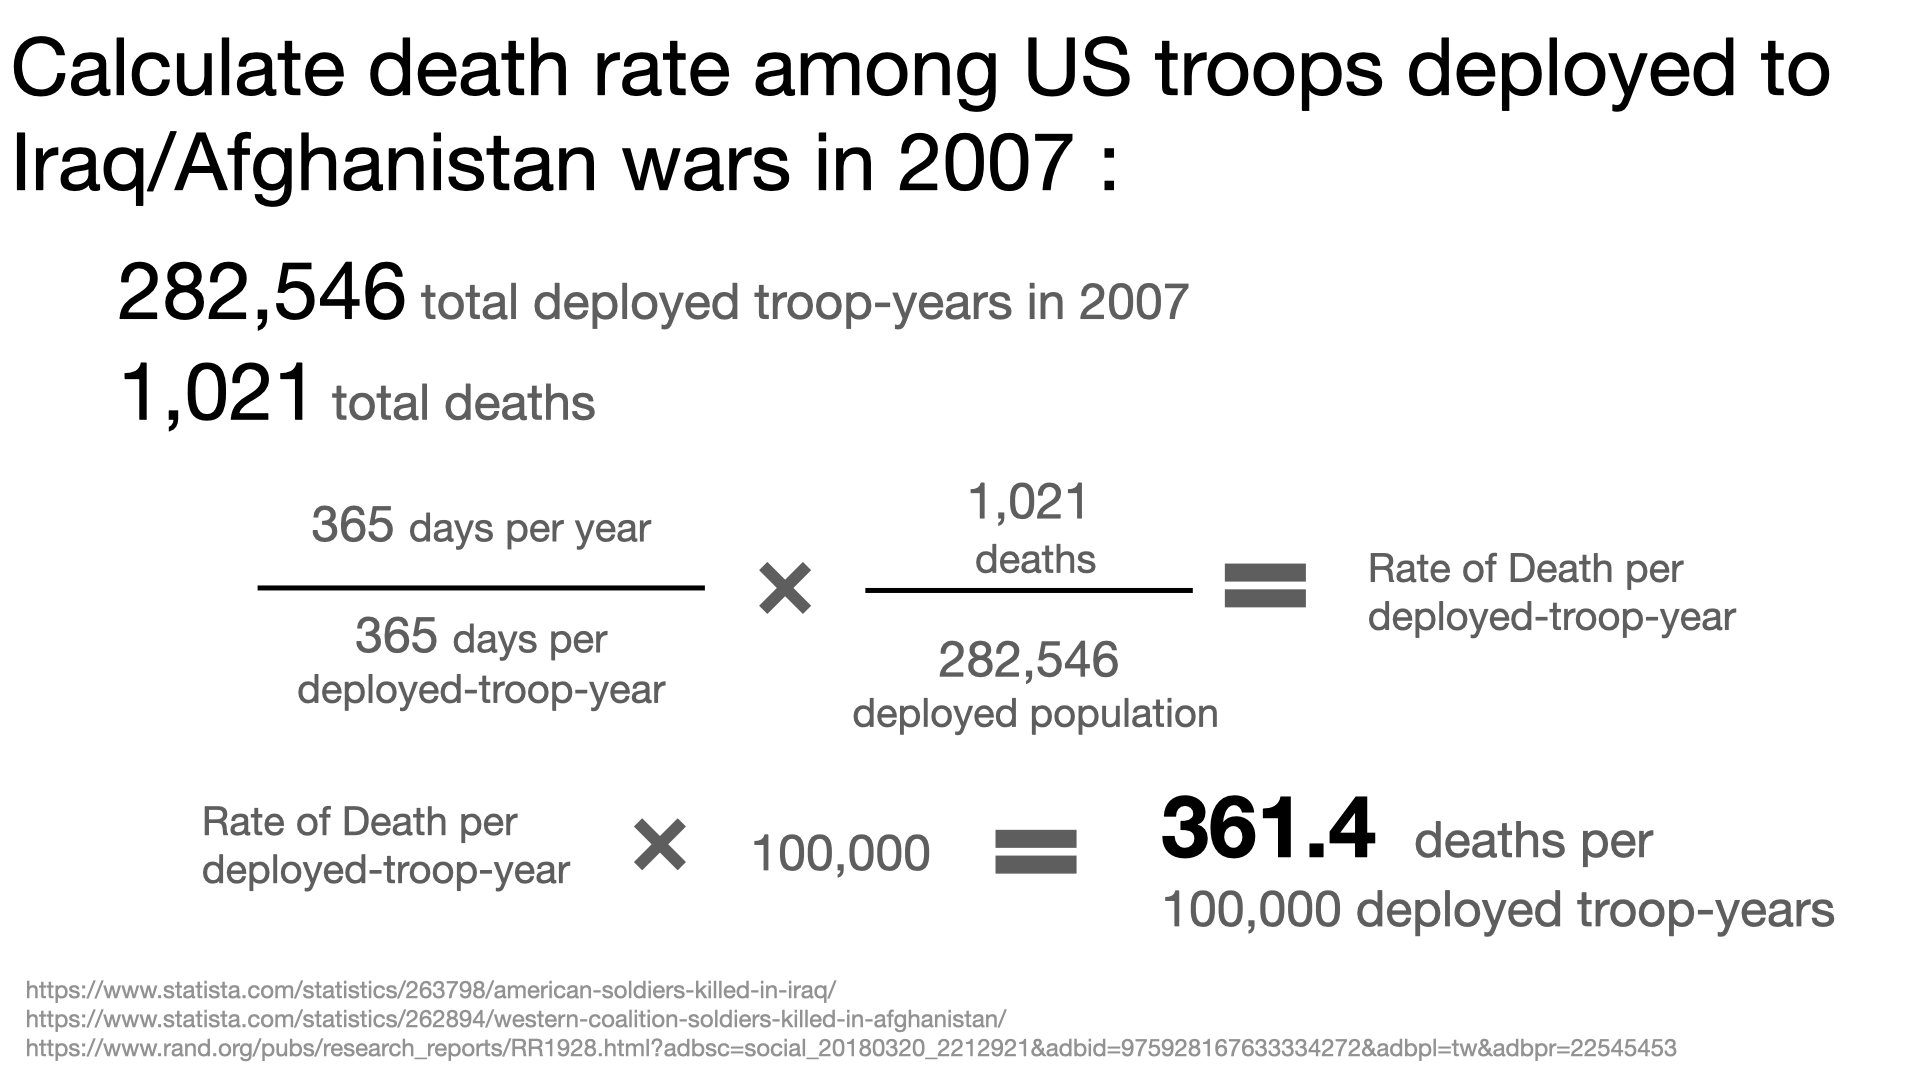

In [1]:
from IPython.core.display import Image, display
import os
display(Image(os.getcwd()+'/math explainer/math explainer.002.jpeg'))
display(Image(os.getcwd()+'/math explainer/math explainer.003.jpeg'))
display(Image(os.getcwd()+'/math explainer/math explainer.004.jpeg'))


# Change to monthly data

In [2]:
361.4*(30/365)

29.704109589041092

# Load libraries and prep for analysis

In [3]:
import os
import wget
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


import datetime as dt



# Load summary of deployment and mortality data from Rand and Statista

In [4]:
warDeaths = pd.read_csv(os.getcwd()+'/data/iraqAfghanWarDeathRates.csv')


In [5]:
warDeaths

,year,troop_years_deployed,iraqDeaths,afghanistanDeaths,totalDeaths,deathsPerHunKyr
0,2001,"30,355.00",0,12,12,39.53
1,2002,"103,701.00",0,49,49,47.25
2,2003,"283,042.00",486,48,534,188.66
3,2004,"252,773.00",849,52,901,356.45
4,2005,"268,103.00",846,99,945,352.48
5,2006,"255,449.00",823,98,921,360.54
6,2007,"282,546.00",904,117,1021,361.36
7,2008,"284,328.00",314,155,469,164.95
8,2009,"291,025.00",148,317,465,159.78
9,2010,"280,530.00",62,498,560,199.62


In [6]:
# convert deployed years colum from string to float
warDeaths.troop_years_deployed = warDeaths.troop_years_deployed.str.replace(',','').astype(float)

In [7]:
# Check the math for 2007:
100000*((904+117)/282546)

361.3570887572289

# Make 2018 MONTHLY rate of death by cause

### US 2018 population: http://www2.census.gov/programs-surveys/popest/tables/2010-2018/national/totals/na-est2018-01.xlsx
### US 2018 deaths: https://www.cdc.gov/nchs/fastats/deaths.htm
### US 2018 traffic deaths: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812826

In [8]:
usPop2018 = 328082386

In [9]:
usDeathTypes = pd.read_csv(os.getcwd()+'/data/cdc_us2018_deathCounts.csv')
trafficDeaths = pd.DataFrame({'cause':['traffic death'],'deaths':[36560]})
usDeathTypes = pd.concat([usDeathTypes,trafficDeaths])

In [10]:
usDeathTypes['deathRate'] = round((30/365)*100000* usDeathTypes.deaths/usPop2018,1)
usDeathTypes

,cause,deaths,deathRate
0,heart disease,655381,16.4
1,cancer,599274,15.0
2,flu_pneumonia,59120,1.5
3,suicide,48344,1.2
0,traffic death,36560,0.9


### The deadliest year in the combined war data was 2007 at __361 fatalities per 100,000 troop-years__

# Load the latest Covid data from JHU Github

In [11]:

fpData = os.getcwd()+'/data/'
## Get daily update of hopkins time series file for confirmed US cases
wget.download('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',\
              out = fpData +'covid_hopkins_overTime_CONFIRMED.csv')
## if file saves as a ____(01).csv, delete the old file and rename new to "covid_hopkins_overTime_CONFIRMED.csv"
if os.path.exists(fpData + "covid_hopkins_overTime_CONFIRMED (1).csv"):
    os.remove(fpData + "covid_hopkins_overTime_CONFIRMED.csv")
    os.rename(fpData + "covid_hopkins_overTime_CONFIRMED (1).csv",fpData + "covid_hopkins_overTime_CONFIRMED.csv")
    

In [12]:
fpData = os.getcwd()+'/data/'
## Get daily update of hopkins time series file for confirmed US cases
wget.download('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv',\
              out = fpData +'covid_hopkins_overTime_DEATHS.csv')
## if file saves as a ____(01).csv, delete the old file and rename new to "covid_hopkins_overTime_CONFIRMED.csv"
if os.path.exists(fpData + "covid_hopkins_overTime_DEATHS (1).csv"):
    os.remove(fpData + "covid_hopkins_overTime_DEATHS.csv")
    os.rename(fpData + "covid_hopkins_overTime_DEATHS (1).csv",fpData + "covid_hopkins_overTime_DEATHS.csv")
    

In [13]:
# Read in new US Confirmed Timeseries data
fpData = os.getcwd()+'/data/'

covidData = pd.read_csv(fpData +'covid_hopkins_overTime_CONFIRMED.csv',dtype={'FIPS':str})
covidData.FIPS = covidData.FIPS.str.split('.').str[0].str.zfill(5)


covidDeaths = pd.read_csv(fpData +'covid_hopkins_overTime_DEATHS.csv',dtype={'FIPS':str})
covidDeaths.FIPS = covidDeaths.FIPS.str.split('.').str[0].str.zfill(5)

# collect dates from timeseries file
dates = []
for i in covidData.columns:
    if '/' in i:
        dates.append(i)
        
fipsList = covidData[~covidData.FIPS.isnull()].FIPS.unique().tolist()



In [14]:
countyPops = pd.read_csv('/Users/alex/Documents/Compare Hopkins and NYT/co-est2019-alldata.csv',encoding='Latin1',\
                        dtype={'STATE':str,'COUNTY':str})
countyPops['fips'] = countyPops.STATE + countyPops.COUNTY
countyPops = countyPops[countyPops.COUNTY!='000']

In [15]:
covidData = pd.merge(covidData,countyPops[['fips','POPESTIMATE2019']],left_on='FIPS',right_on='fips',how='left')

In [16]:
covidDeaths = pd.merge(covidDeaths,countyPops[['fips','POPESTIMATE2019']],left_on='FIPS',right_on='fips',how='left')

In [17]:
dates = []
for i in covidDeaths.columns:
    if '/' in i:
        dates.append(i)

In [18]:
covidDeaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,fips,POPESTIMATE2019
0,84001001,US,USA,840,01001,Autauga,Alabama,US,32.539527,-86.644082,...,41,42,42,42,42,42,42,42,01001,55869.0
1,84001003,US,USA,840,01003,Baldwin,Alabama,US,30.727750,-87.722071,...,98,98,98,98,98,98,137,137,01003,223234.0
2,84001005,US,USA,840,01005,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,10,11,11,11,29,01005,24686.0
3,84001007,US,USA,840,01007,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,17,17,17,18,38,01007,22394.0
4,84001009,US,USA,840,01009,Blount,Alabama,US,33.982109,-86.567906,...,39,40,40,40,40,40,40,43,01009,57826.0


# Make comparative rate bar charts

### dataframe of annual rates of death in the US from most recent year available

In [19]:
warDeaths

,year,troop_years_deployed,iraqDeaths,afghanistanDeaths,totalDeaths,deathsPerHunKyr
0,2001,30355.0,0,12,12,39.53
1,2002,103701.0,0,49,49,47.25
2,2003,283042.0,486,48,534,188.66
3,2004,252773.0,849,52,901,356.45
4,2005,268103.0,846,99,945,352.48
5,2006,255449.0,823,98,921,360.54
6,2007,282546.0,904,117,1021,361.36
7,2008,284328.0,314,155,469,164.95
8,2009,291025.0,148,317,465,159.78
9,2010,280530.0,62,498,560,199.62


In [20]:
warDeaths.deathsPerHunKyr.max()*(30/365)

29.70082191780822

In [21]:
# Data: https://www.statista.com/statistics/248622/rates-of-leading-causes-of-death-in-the-us/
# https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812826
{'traffic accident':11.2,'suicide':14.2,'influenza/pneumonia':14.9,\
                   'cancer':141.9,'heart disease':163.6,'Worst annual Iraq/Afghanistan losses':361.4}
# formatting names for vis later (endlines give spacing off x axis)
df = pd.DataFrame({'cause':['\nUS\ntraffic accident\n(2018)','\nUS\nsuicide\n(2018)','\nUS\ninfluenza/\npneumonia\n(2018)','\nUS\ncancer\n(2018)','\nUS\nheart\ndisease\n(2018)','\ndeployed troops\nworst year of \nIraq/Afghanistan\n(2007)'],\
          'monthlyDeathRate':[usDeathTypes[usDeathTypes.cause=='traffic death'].deathRate.item(),\
                       usDeathTypes[usDeathTypes.cause=='suicide'].deathRate.item(),\
                       usDeathTypes[usDeathTypes.cause=='flu_pneumonia'].deathRate.item(),\
                       usDeathTypes[usDeathTypes.cause=='cancer'].deathRate.item(),\
                       usDeathTypes[usDeathTypes.cause=='heart disease'].deathRate.item(),\
                       round(warDeaths.deathsPerHunKyr.max()*(30/365),1)]})
df

,cause,monthlyDeathRate
0,\nUS\ntraffic accident\n(2018),0.9
1,\nUS\nsuicide\n(2018),1.2
2,\nUS\ninfluenza/\npneumonia\n(2018),1.5
3,\nUS\ncancer\n(2018),15.0
4,\nUS\nheart\ndisease\n(2018),16.4
5,\ndeployed troops\nworst year of \nIraq/Afghan...,29.7


## So: an average month in the deadliest year of the wars in Iraq and Afghanistan had a mortality rate of 29.7 deaths per 100,000 troops

In [22]:
# endDate = dates[-1]
endDate = '11/30/20'
dateTimeEndDay = dt.datetime.strptime(endDate,'%m/%d/%y')
dateTimeBeginDay = dateTimeEndDay - dt.timedelta(days=30)
beginDate = dt.datetime.strftime(dateTimeBeginDay,'%-m/%-d/%y')
print('endDate:{}'.format(endDate))
print('beginDate:{}'.format(beginDate))


endDate:11/30/20
beginDate:10/31/20


In [23]:
# Calculate death rate in the last 30 days in the 
# states of ND, SD, MT combined
stateDeathRate = covidDeaths[['Admin2','Province_State',beginDate,endDate,'POPESTIMATE2019']]

stateDeathRate.head()

,Admin2,Province_State,10/31/20,11/30/20,POPESTIMATE2019
0,Autauga,Alabama,31,42,55869.0
1,Baldwin,Alabama,71,98,223234.0
2,Barbour,Alabama,9,11,24686.0
3,Bibb,Alabama,15,17,22394.0
4,Blount,Alabama,25,40,57826.0


In [24]:
# Check population sums
stateDeathRate[stateDeathRate.Province_State=='Montana'].POPESTIMATE2019.sum()


1068778.0

In [25]:
# This checks withe the US Census 2019 population of Montana
# https://www.census.gov/quickfacts/MT
#  1,068,778

In [26]:

stateDeathRate['30dayDeaths'] = stateDeathRate[endDate] - stateDeathRate[beginDate]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
mtDeaths = stateDeathRate[stateDeathRate.Province_State=='Montana']['30dayDeaths'].sum()
mtPop = stateDeathRate[stateDeathRate.Province_State=='Montana'].POPESTIMATE2019.sum()
mt30dayDeathRate = 100000*(mtDeaths/mtPop)
mt30dayDeathRate

28.630828853138816

In [28]:
stateDeathRate = pd.DataFrame(stateDeathRate.groupby('Province_State')[['30dayDeaths','POPESTIMATE2019']].sum()).reset_index()
stateDeathRate['30dayDeathRate'] = round(100000*(stateDeathRate['30dayDeaths']/stateDeathRate['POPESTIMATE2019']),1)
stateDeathRate = stateDeathRate[(~stateDeathRate['30dayDeathRate'].isnull())&(stateDeathRate.POPESTIMATE2019>0)]


In [29]:
stateDeathRate.sort_values('30dayDeathRate',ascending=False)

,Province_State,30dayDeaths,POPESTIMATE2019,30dayDeathRate
47,South Dakota,521,884659.0,58.9
38,North Dakota,409,762062.0,53.7
30,Montana,306,1068778.0,28.6
35,New Mexico,550,2096829.0,26.2
17,Illinois,2945,12671821.0,23.2
19,Iowa,710,3155070.0,22.5
57,Wyoming,128,578759.0,22.1
18,Indiana,1391,6732219.0,20.7
27,Minnesota,1141,5639632.0,20.2
56,Wisconsin,1155,5822434.0,19.8


### Look at national covid death rate over the 30 day window

In [30]:
stateDeathRate.POPESTIMATE2019.sum()

328239523.0

In [31]:
national30dayDeathRate = 100000*stateDeathRate['30dayDeaths'].sum()/stateDeathRate.POPESTIMATE2019.sum()
national30dayDeathRate

11.150089320596534

In [32]:
usDeathRate = round(100000*(covidDeaths[endDate].sum() - covidDeaths[beginDate].sum())/covidDeaths.POPESTIMATE2019.sum(),1)
usDeathRate

11.2

In [33]:

df = pd.concat([df[:3],pd.DataFrame({'cause':['\nUS\nCovid'],\
                    'monthlyDeathRate':[usDeathRate]}),
        df[3:]])

In [34]:
df

,cause,monthlyDeathRate
0,\nUS\ntraffic accident\n(2018),0.9
1,\nUS\nsuicide\n(2018),1.2
2,\nUS\ninfluenza/\npneumonia\n(2018),1.5
0,\nUS\nCovid,11.2
3,\nUS\ncancer\n(2018),15.0
4,\nUS\nheart\ndisease\n(2018),16.4
5,\ndeployed troops\nworst year of \nIraq/Afghan...,29.7


## North Dakota and South Dakota had higher Covid-19 death rates in November than an average month in the dealiest year of Iraq and Afghanistan (which was 29.7 fatalities per 100,000 deployed troops per month)

In [35]:
df = df[df.cause!=''] # remove placehoders
dg = pd.DataFrame({'cause':['\nND\nCovid','\nSD\nCovid'],\
                  'monthlyDeathRate':\
                  [stateDeathRate[stateDeathRate.Province_State=='North Dakota']['30dayDeathRate'].item(),\
                  stateDeathRate[stateDeathRate.Province_State=='South Dakota']['30dayDeathRate'].item(),\
                  ]})
df = pd.concat([df,dg])
df



,cause,monthlyDeathRate
0,\nUS\ntraffic accident\n(2018),0.9
1,\nUS\nsuicide\n(2018),1.2
2,\nUS\ninfluenza/\npneumonia\n(2018),1.5
0,\nUS\nCovid,11.2
3,\nUS\ncancer\n(2018),15.0
4,\nUS\nheart\ndisease\n(2018),16.4
5,\ndeployed troops\nworst year of \nIraq/Afghan...,29.7
0,\nND\nCovid,53.7
1,\nSD\nCovid,58.9


In [36]:
my_colors = ['#968c81','#968c81','#968c81','#cc1212','#968c81','#968c81','#968c81','#cc1212','#cc1212','#cc1212']


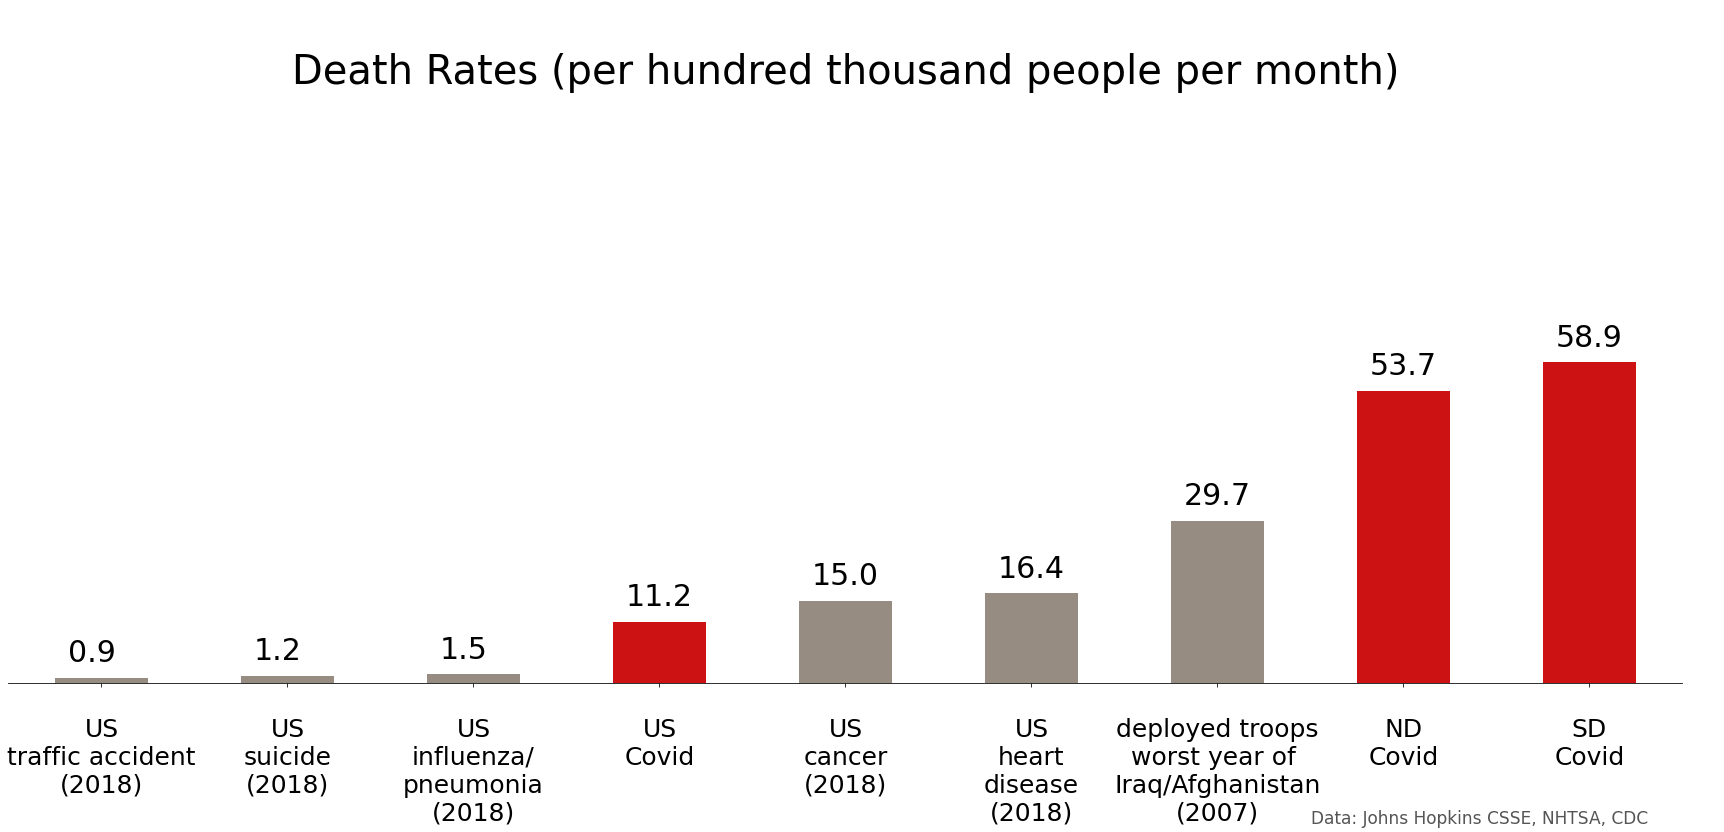

In [37]:
fig, ax = plt.subplots(1, figsize=(30, 10))# remove the axis

ax = df.plot.bar(ax=ax,x='cause',y='monthlyDeathRate',rot=0,ylim=((0,100)),fontsize=20,legend=False,color=my_colors)
plt.title('\nDeath Rates (per hundred thousand people per month)\n', fontsize=40)
ax.tick_params(axis='x', which='both', labelsize=25)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + .07, p.get_height() +3),fontsize=30)
# plt.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set(yticklabels=[])  
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks
ax.set(xlabel=None)  # remove the x-axis label

ax.annotate('Data: Johns Hopkins CSSE, NHTSA, CDC', xy=(0.76, .01), xycoords='figure fraction', fontsize=17, color='#555555')


filename = os.getcwd()+ '/deathRateBarChart_NationalWithStates.png'
plt.savefig(filename,dpi=300,bbox_inches="tight",facecolor='white')
barsList = [filename]

In [40]:
import pip #needed to use the pip functions

from pip._internal.operations.freeze import freeze
for requirement in freeze(local_only=True):
    if requirement.split('=')[0].lower() in ['os','wget','pandas','matplotlib','datetime']:
        print(requirement)

matplotlib==3.3.1
pandas==1.1.1
wget==3.2
